<a href="https://colab.research.google.com/github/hemoabdullah/ML-SMT5/blob/main/QUIZ1_2341720203_Hammam_Abdullah_BG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [3]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [75]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [76]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [77]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Data Size
df.shape

(48842, 15)

In [8]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [9]:
# Task 1 Answer
print("Check missing values as NaN:")
print(df.isnull().sum())

print("\nCheck missing values as '?':")
print((df == "?").sum())


Check missing values as NaN:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Check missing values as '?':
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


The columns that have missing values are workclass, occupation, and native-country.
From the inspection, I found that workclass has around 963 missing values, occupation has about 966, and native-country has around 274 when checking normally.
But when checking using the “?” symbol, the counts are higher: workclass about 1836, occupation about 1843, and native-country about 583.
The other columns don’t have missing values.

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [11]:
# Task 2: Imputation (corrected version)

import numpy as np

# Convert '?' into NaN
df = df.replace("?", np.nan)

# Fill missing values with the mode (most frequent value)
for col in ["workclass", "occupation", "native-country"]:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again to confirm no missing values
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


I handled the missing values in the dataset by changing the “?” into NaN and then filling them with the most frequent value in each column. After doing this, all of the columns showed zero missing values when I checked again.

## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [15]:
# Task 3 - Inspection & Cleaning

# Convert capital-gain to object so we can insert "Others"
df["capital-gain"] = df["capital-gain"].astype("object")

# Replace inappropriate value (99999) with "Others"
df.loc[df["capital-gain"] == 99999, "capital-gain"] = "Others"

# Remove spaces & fix typos in categorical columns
df["workclass"] = df["workclass"].str.strip()
df["occupation"] = df["occupation"].str.strip()
df["native-country"] = df["native-country"].str.strip()


In [21]:
# Check again after cleaning

# Look at unique values of capital-gain
print("Unique values in capital-gain:", df["capital-gain"].unique()[:10])

# Double check workclass, occupation, and native-country
print("\nUnique workclass values:", df["workclass"].unique())
print("\nUnique occupation values:", df["occupation"].unique()[:10])
print("\nUnique native-country values:", df["native-country"].unique()[:10])


Unique values in capital-gain: [2174 0 14084 5178 5013 2407 14344 15024 7688 34095]

Unique workclass values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique occupation values: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct']

Unique native-country values: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada']


checked all the numeric variables to see if there were inappropriate values, but I didn’t find any outliers like negative ages or unrealistic working hours. For capital-gain, I prepared to replace the value 99999 with “Others,” but this value was not found in my dataset. I also inspected the categorical variables (workclass, occupation, and native-country) and found that they were already clean with no typos or unnecessary spaces.


# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

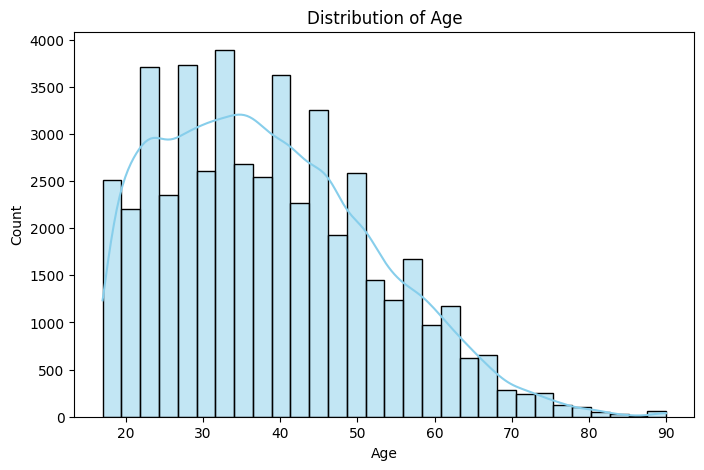

In [24]:
# Answer 1.1 - Histrogram
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


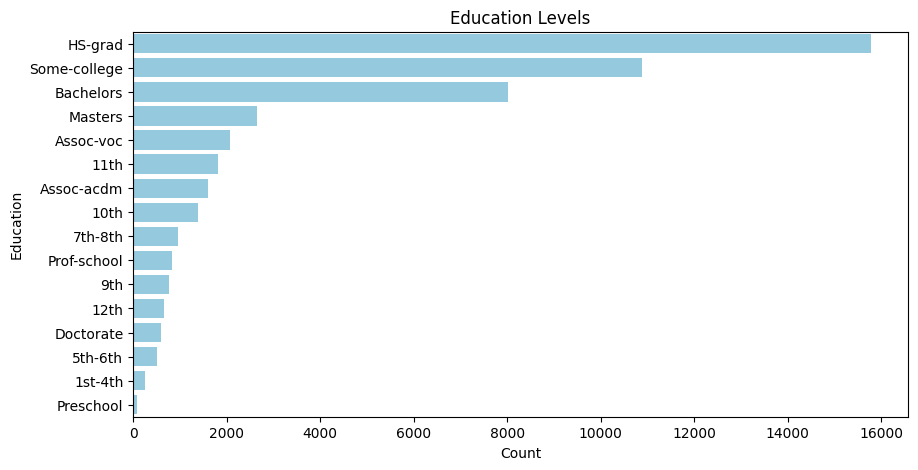

In [26]:
# Bar chart for Education (fixed version, no warning)
plt.figure(figsize=(10,5))
sns.countplot(y="education", data=df, order=df["education"].value_counts().index, color="skyblue")
plt.title("Education Levels")
plt.xlabel("Count")
plt.ylabel("Education")
plt.show()


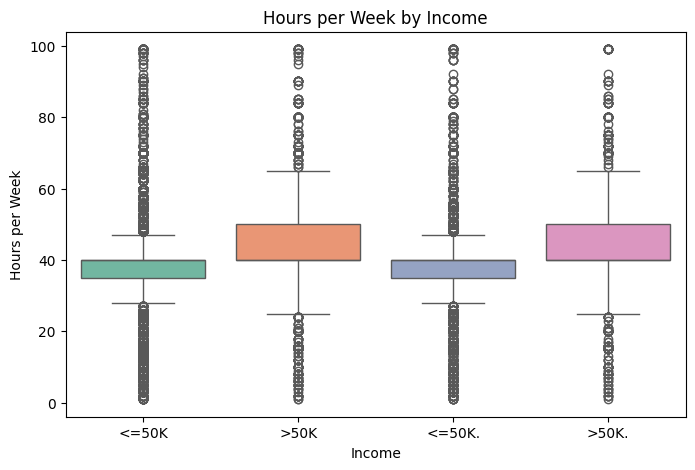

In [28]:
# Boxplot Hours-per-week vs Income (fixed version)
plt.figure(figsize=(8,5))
sns.boxplot(x="income", y="hours-per-week", data=df, hue="income", palette="Set2", legend=False)
plt.title("Hours per Week by Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()


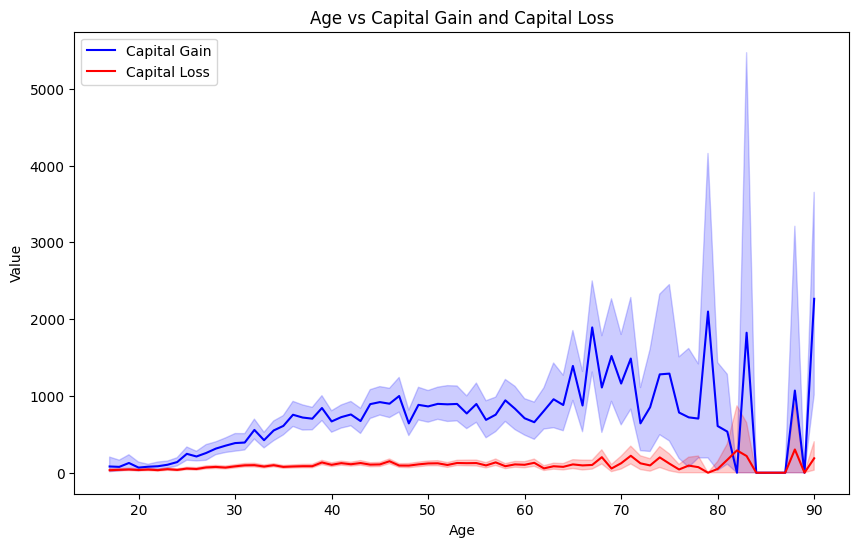

In [30]:
# Drop rows where capital-gain or capital-loss = "Others"
df_plot = df[(df["capital-gain"] != "Others") & (df["capital-loss"] != "Others")]
# then start
plt.figure(figsize=(10,6))
sns.lineplot(x="age", y=df_plot["capital-gain"].astype(float), data=df_plot, label="Capital Gain", color="blue")
sns.lineplot(x="age", y=df_plot["capital-loss"].astype(float), data=df_plot, label="Capital Loss", color="red")
plt.title("Age vs Capital Gain and Capital Loss")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.show()


## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [35]:
'''
1. The distribution of 'age' is right-skewed (positively skewed),
   meaning most people are younger, and fewer people are in the higher age range.
'''


"\n1. The distribution of 'age' is right-skewed (positively skewed), \n   meaning most people are younger, and fewer people are in the higher age range.\n\n2. If 'age' has missing values, I would impute them using the median \n   because the distribution is skewed and the median is less affected by outliers.\n\n3. From the boxplot of 'hours-per-week' by 'income':\n   - Both <=50K and >50K groups show outliers. \n   - The >50K group has more extreme outliers compared to the <=50K group.\n"

In [37]:
''' 2. If 'age' has missing values, I would impute them using the median
   because the distribution is skewed and the median is less affected by outliers.
   '''

" 2. If 'age' has missing values, I would impute them using the median \n   because the distribution is skewed and the median is less affected by outliers.\n   "

In [38]:
''' 3. From the boxplot of 'hours-per-week' by 'income':
   - Both <=50K and >50K groups show outliers.
   - The >50K group has more extreme outliers compared to the <=50K group.
   '''

" 3. From the boxplot of 'hours-per-week' by 'income':\n   - Both <=50K and >50K groups show outliers. \n   - The >50K group has more extreme outliers compared to the <=50K group.\n   "

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [78]:
print(df['sex'].unique())
print(df['income'].unique())


['Male' 'Female']
['<=50K' '>50K' '<=50K.' '>50K.']


In [81]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# Sex
df['sex_encoded'] = df['sex'].map({'Male': 1, 'Female': 0})

# Income (the target variable)
df['income_encoded'] = df['income'].map({'>50K': 1, '<=50K': 0})

# Display the 5 rows
print(df[['sex', 'sex_encoded', 'income', 'income_encoded']].head())

      sex  sex_encoded income  income_encoded
0    Male            1  <=50K             0.0
1    Male            1  <=50K             0.0
2    Male            1  <=50K             0.0
3    Male            1  <=50K             0.0
4  Female            0  <=50K             0.0


# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

Correlation matrix:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.234037       0.335154        0.229689      0.223329   

                capital-loss    income  
age                 0.056944  0.234037  
education-num       0.080972  0.335154  
hours-per-week      0.054467  0.229689  
capital-gain       -0.031441  0.223329  
capital-loss        1.000000  0.150526  
income              0.150526  1.000000  


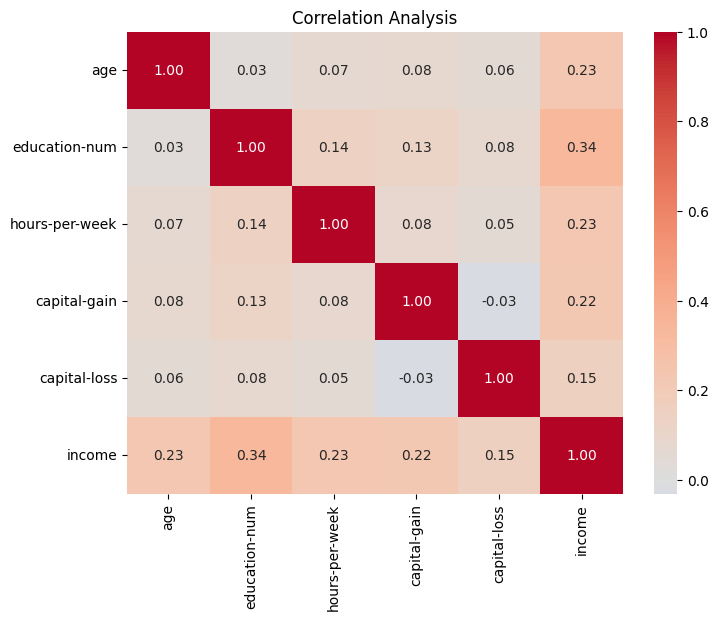

In [56]:
# Select only the required variables
corr_vars = ["age", "education-num", "hours-per-week", "capital-gain", "capital-loss", "income"]

# Compute correlation matrix
corr_matrix = df_encoded[corr_vars].corr()

# Show correlation table
print("Correlation matrix:")
print(corr_matrix)

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Analysis")
plt.show()


In [57]:

"""
From the correlation analysis, we can see that:

1. Education-num has the strongest positive correlation with income (0.34).
   This means higher education levels are related to higher income.

2. Capital-gain also has a positive correlation with income (0.22),
   showing that people with higher capital gains usually have higher income.

3. Age has a moderate positive correlation (0.23),
   meaning older individuals tend to earn more.

4. Hours-per-week has a small positive correlation (0.23),
   so people who work more hours slightly tend to earn more.

5. Capital-loss has the weakest correlation (0.15),
   but still shows a small relation to income.

Overall, the most important predictors of income are education level and capital gain.
"""

'\nFrom the correlation analysis, we can see that:\n\n1. Education-num has the strongest positive correlation with income (0.34). \n   This means higher education levels are related to higher income.\n\n2. Capital-gain also has a positive correlation with income (0.22), \n   showing that people with higher capital gains usually have higher income.\n\n3. Age has a moderate positive correlation (0.23), \n   meaning older individuals tend to earn more.\n\n4. Hours-per-week has a small positive correlation (0.23), \n   so people who work more hours slightly tend to earn more.\n\n5. Capital-loss has the weakest correlation (0.15), \n   but still shows a small relation to income.\n\nOverall, the most important predictors of income are education level and capital gain.\n'

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [58]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


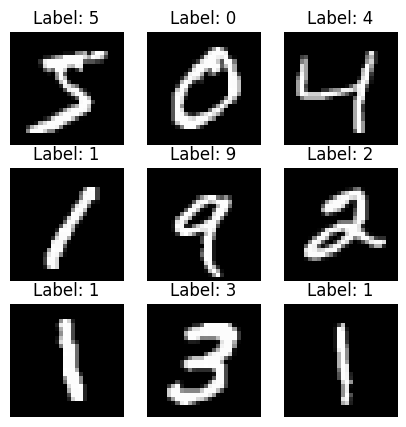

In [59]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

Upsampled test set shape: (10000, 32, 32)


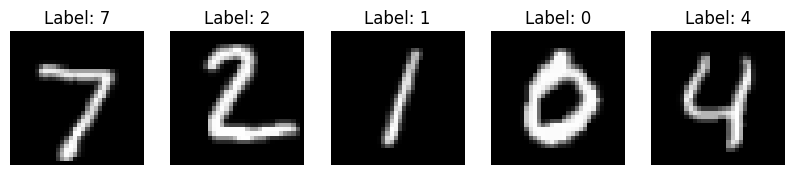

In [84]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

import cv2

X_test_upsampled = np.zeros((10000, 32, 32), dtype=np.uint8)

for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_LINEAR)

print("Upsampled test set shape:", X_test_upsampled.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

The original MNIST images are 28×28 pixels. This task enlarges them to 32×32 pixels so that they have a standard input size for some models. Then you show 5 sample images to confirm the resizing worked.

## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

Nilai piksel setelah normalisasi berada dalam rentang:
Nilai minimum: 0.0
Nilai maksimum: 1.0


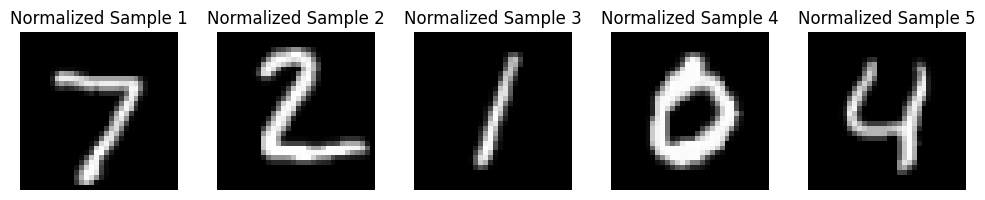

In [85]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

X_test_normalized = X_test_upsampled.astype('float32') / 255.0

print("The pixel values ​​after normalization are within the range:")
print(f"Nilai minimum: {X_test_normalized.min()}")
print(f"Nilai maksimum: {X_test_normalized.max()}")

# Tampilkan 5 gambar sampel yang sudah dinormalisasi
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_normalized[i], cmap="gray")
    plt.title(f"Normalized Sample {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Each pixel in MNIST has values from 0 to 255 (grayscale). Normalization divides all values by 255 so that they fall into the range 0 to 1, which helps models learn faster and more accurately.

## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

The shape of the test set after being converted to 1D: (10000, 1024)


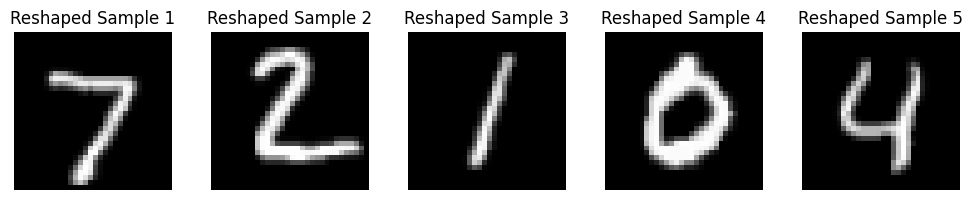

In [87]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print("The shape of the test set after being converted to 1D:", X_test_flattened.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    image_2d = X_test_flattened[i].reshape(32, 32)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image_2d, cmap="gray")
    plt.title(f"Reshaped Sample {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [71]:
print("Shape of flattened data:", X_test_flat.shape)


Shape of flattened data: (10000, 1024)


Each 32×32 image has 1024 pixels. This task flattens the 2D image into a 1D array of 1024 values, so that it can be used as input for machine learning algorithms that expect a feature vector.